In [1]:
from fpdf import FPDF

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import table

%matplotlib inline

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [3]:
import plotly.graph_objects as go
import plotly
import plotly.express as px

In [4]:
# Set up the default pdf format
fpdf = FPDF(orientation = 'P', unit = 'mm', format='A4') #P - portrait 

# Data Importing and Cleaning

In [43]:
#Import the csv file which is about online retail
df = pd.read_csv('data.csv', encoding='latin1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [44]:
df['TotalSale'] = df['Quantity'] * df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSale
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


In [45]:
import datetime
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"],format="%m/%d/%Y %H:%M")
df["DateOnly"] = df["InvoiceDate"].dt.date
df["InvoiceDate"].head()

0   2010-12-01 08:26:00
1   2010-12-01 08:26:00
2   2010-12-01 08:26:00
3   2010-12-01 08:26:00
4   2010-12-01 08:26:00
Name: InvoiceDate, dtype: datetime64[ns]

In [46]:
df["month"] = df["InvoiceDate"].dt.month
df["year"] = df["InvoiceDate"].dt.year
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSale,DateOnly,month,year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01,12,2010
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,12,2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12-01,12,2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,12,2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,12,2010


In [47]:
#strftime is a method from datetime, to find the number of weeks
df["Week"] = df["InvoiceDate"].dt.strftime("%U").astype(int) 
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSale,DateOnly,month,year,Week
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01,12,2010,48
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,12,2010,48
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12-01,12,2010,48
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,12,2010,48
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,12,2010,48


In [48]:

df_uk = df[df['Country']=='United Kingdom']
df_uk = df_uk[df_uk['CustomerID'].notnull()]
df_uk.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSale,DateOnly,month,year,Week
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01,12,2010,48
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,12,2010,48
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12-01,12,2010,48
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,12,2010,48
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,12,2010,48


In [8]:
# Find out top 10 Gross Revenue invoices
top_10_inovice = pd.DataFrame(df_uk.groupby('InvoiceNo')['TotalSale'].sum().sort_values(ascending=False).head(10))
top_10_inovice = top_10_inovice.reset_index()

## Country Sales data by the features

In [10]:
# Make a country_values file which includes totalsale, the stock code, and customer ID.
country_totalsale = pd.DataFrame(df.groupby(by="Country")["TotalSale"].sum().reset_index())
country_counts = pd.DataFrame(df.groupby(by="Country")["CustomerID"].nunique().reset_index())
country_stockcode = pd.DataFrame(df.groupby(by="Country")["StockCode"].nunique().reset_index())

In [11]:
# Merge 3 dataframes into 1 dataframe (Except UK)
country_values = pd.merge(country_totalsale, country_counts, on="Country")
country_values = pd.merge(country_values, country_stockcode, on="Country")
country_values = country_values[(country_values['Country'] != "United Kingdom")&(country_values['Country'] != "Unspecified")] #UK value is way too big
# Extract UK values because it is way too big.
country_values.head()

,Country,TotalSale,CustomerID,StockCode
0,Australia,137077.27,9,600
1,Austria,10154.32,11,307
2,Bahrain,548.40,2,16
3,Belgium,40910.96,25,778
4,Brazil,1143.60,1,32


In [12]:
# Except the result of United Kingdom
fig = px.scatter(country_values, x="CustomerID", y="StockCode",
                 size="TotalSale", color="Country", title="The relationship between Number of Stock Code and Customers",
                 labels={
                     "CustomerID":"Number of Customer",
                     "StockCode":"Number of Stock Codes"
                 })

# Convert the chart to an image file to import in the pdf file.
fig.write_image("scatter_plot.png")

fig.show()

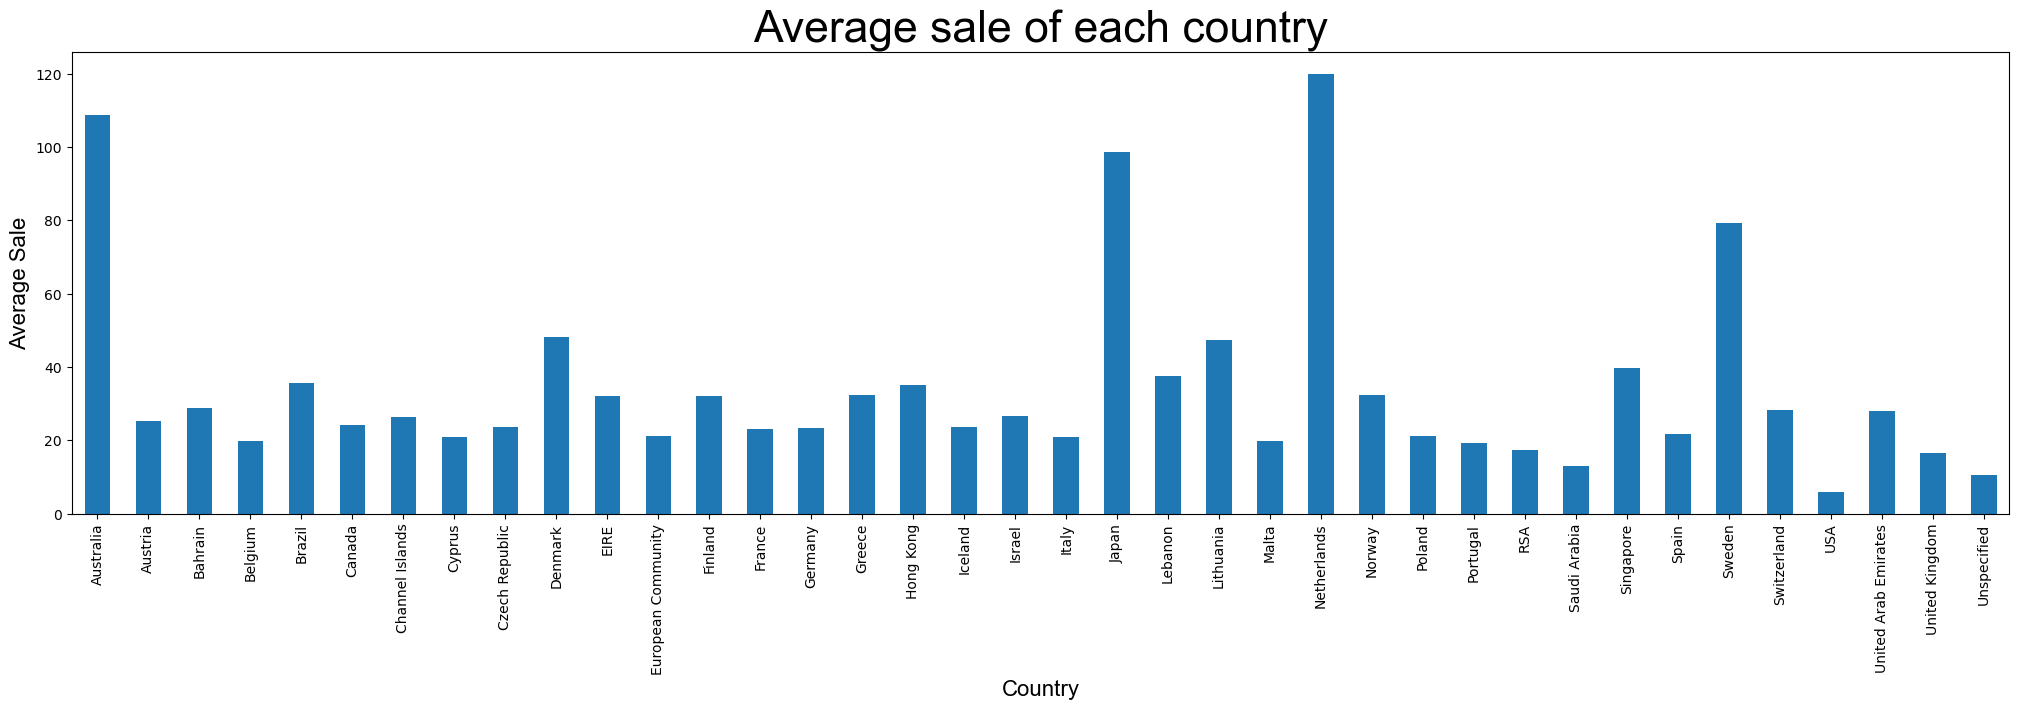

In [27]:
# Make a bar plot to show the average sale of each country
plt.figure(figsize=(25,6))
avg_sale_chart = df.groupby('Country')['TotalSale'].mean().plot(
    kind='bar')

plt.title("Average sale of each country", fontsize=32, fontname='Arial')
plt.xlabel("Country", fontsize=16, fontname='Arial')
plt.ylabel("Average Sale", fontsize=16, fontname='Arial')

#Convert the chart to image file
plt.savefig('avg_sale_chart.png')

plt.show()
#plt.savefig('country_average_sale.png')

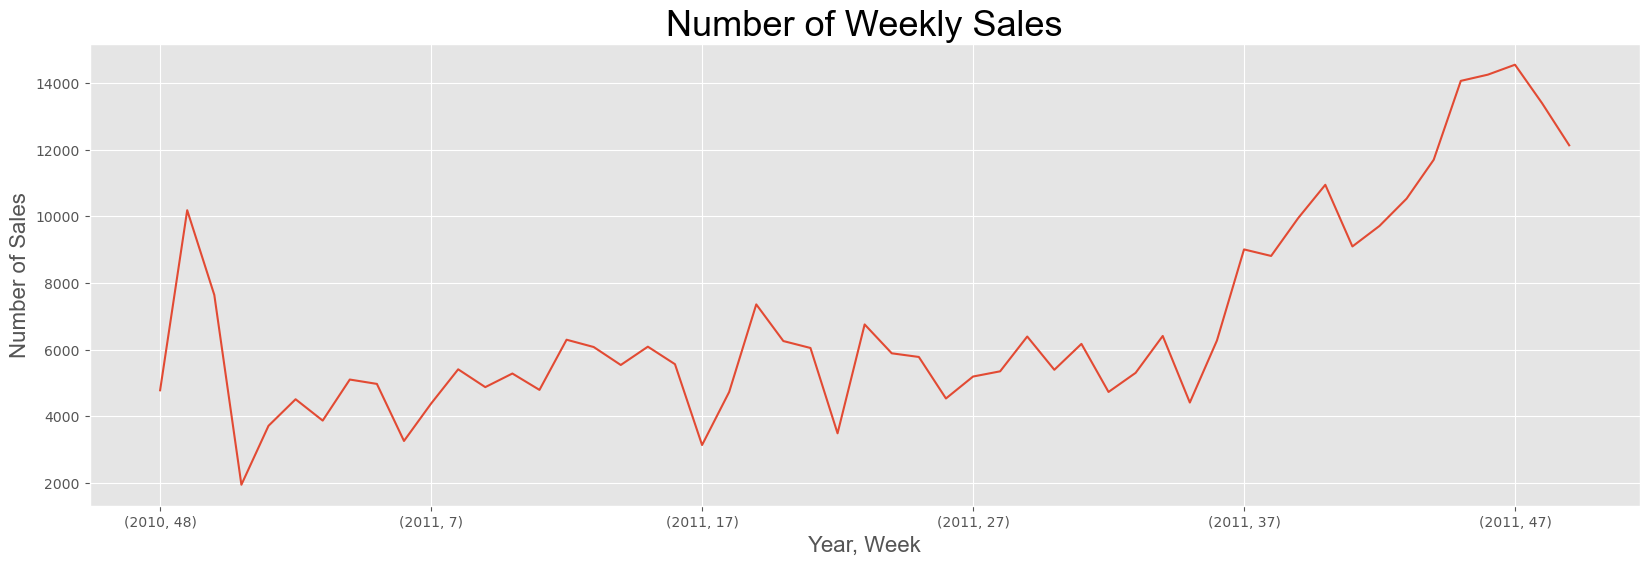

In [105]:
fig = plt.figure(figsize=(20, 6))

plt.style.use("ggplot")
              
number_of_sales_date = df_uk.groupby("year")['Week'].value_counts(sort=False)
number_of_sales_date.plot()

plt.title('Number of Weekly Sales', fontsize=26, fontname="Arial")
plt.xlabel('Year, Week', fontsize=16, fontname="Arial")
plt.ylabel('Number of Sales', fontsize=16, fontname="Arial")

plt.savefig("Number of Weekly Sales.png")

plt.show()

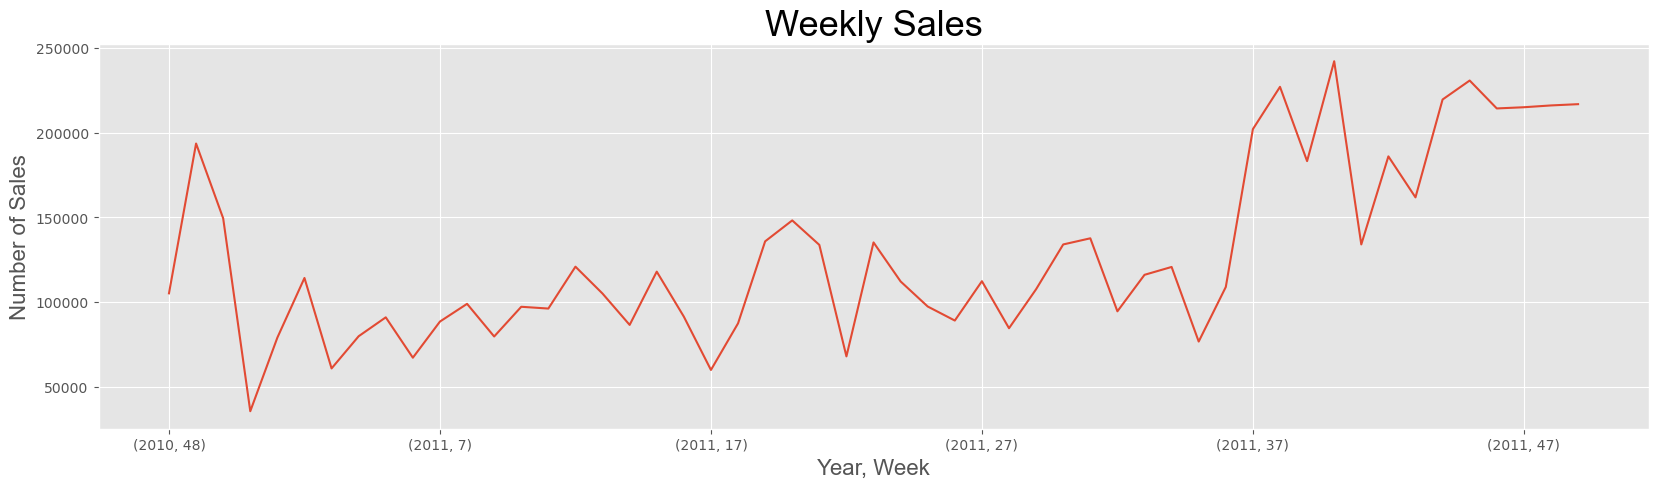

In [106]:
weekly_total_sale = df_uk.groupby(["year","Week"])["TotalSale"].sum()
plt.figure(figsize=(20,5))
weekly_total_sale.plot()


plt.title('Weekly Sales', fontsize=26, fontname="Arial")
plt.xlabel('Year, Week', fontsize=16, fontname="Arial")
plt.ylabel('Number of Sales', fontsize=16, fontname="Arial")

plt.savefig("Weekly Sales.png")

plt.show()

# Generate a PDF File

In [144]:
class PDF(FPDF):
    def header(self):
        # Logo
        self.image('midas_logo.png', 180, 10, 20)
        # Arial bold 15
       # self.set_font('Arial', 'BI', 15)
        # Move to the right
       # self.cell(80)
        # Title
       # self.cell(30, 10, 'Title', 1, 0, 'C')
        # Line break
        self.ln(20)

    # Page footer
    def footer(self):
        # Position at 1.5 cm from bottom
        self.set_y(-15)
        # Arial italic 8
        self.set_font('Arial', 'I', 8)
        # Page number
        self.cell(0, 10, 'Page ' + str(self.page_no()), 0, 0, 'C')
    
pdf = PDF()

# 1st Page
pdf.add_page()
pdf.set_font('Arial', '', 12)

pdf.cell(0, 10, "1. Show the approximate sales of each country")
pdf.image("avg_sale_chart.png", x=5, y=50, w=200)

pdf.ln() #Blank

pdf.cell(0, 150, "2. Scatter Plot of the relationship between the features", 0, 1)
pdf.image("scatter_plot.png", x=5, y=120, w=200)

#2nd Page
pdf.add_page()

pdf.cell(0, 10, "3. Number of Weekly Sales", 0, 1)
pdf.image("Number of Weekly Sales.png", x=5, y=50, w=200)

pdf.ln() #Blank

pdf.cell(0, 150, "4. Weekly Sales", 0, 1)
pdf.image("Weekly Sales.png", x=5, y=140, w=200)


pdf.output('Report_2.pdf')

''